Exercise 3-1


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
from numpy import loadtxt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from nrkmeans import NrKmeans


In [2]:
# Load Data
data = np.loadtxt('stickfigures.data', delimiter=";")
labels = data[:, [0, 1, 2]].astype(int)
# normalize to 0, 1
data = data[:, 3:] / 255

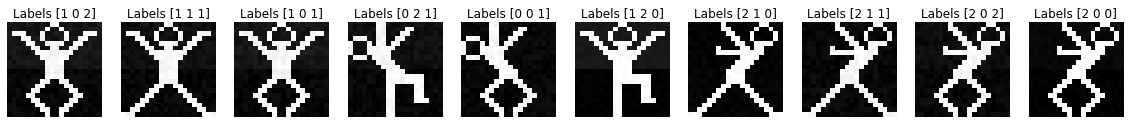

In [8]:
random_state = 0
rng = np.random.default_rng(random_state)
rand_idx = rng.choice(data.shape[0], size=10, replace=False)
images = data[rand_idx,:].reshape(-1, 20,20)

fig, axes = plt.subplots(1, len(images), figsize=(20,20))
i = 0
for img_i, ax_i in zip(images, axes):
    ax_i.axis('off')
    ax_i.imshow(img_i, cmap = plt.get_cmap('gray'))
    ax_i.set_title(f"Labels {labels[rand_idx[i]]}")
    i += 1
plt.show()

## a)

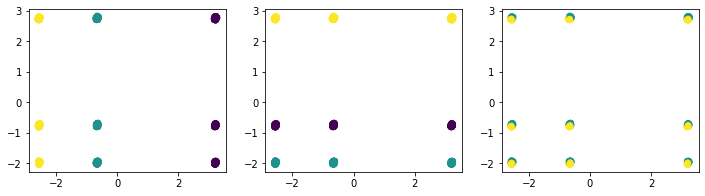

In [136]:
pca = PCA(n_components=2).fit(data)

#2d projection
projection = pca.transform(data)

plt.figure(figsize =(12,3))

plt.subplot(1,3,1)
plt.scatter(projection[:, 0], projection[:, 1], c = labels[:,0])

plt.subplot(1,3,2)
plt.scatter(projection[:, 0], projection[:, 1], c = labels[:,1])

plt.subplot(1,3,3)
plt.scatter(projection[:, 0], projection[:, 1], c = labels[:,2])

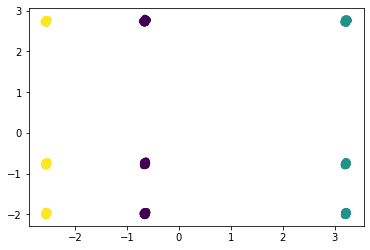

In [138]:
#applying kmeans
km = KMeans(n_clusters=3).fit_predict(data)

plt.scatter(projection[:, 0], projection[:, 1], c=km)

## b)

In [34]:
nrkmeans = NrKmeans(n_clusters = ([3, 3, 3, 1])).fit(data)

found solution with: 289.67677258946657 (current best is -1)
found solution with: 62.7155829167284 (current best is 289.67677258946657)
found solution with: 4329.690300216771 (current best is 62.7155829167284)
found solution with: 270.95101749836107 (current best is 62.7155829167284)
found solution with: 2018.2316388777347 (current best is 62.7155829167284)
found solution with: 4326.840201975484 (current best is 62.7155829167284)
[NrKmeans] ATTENTION:
Subspaces were lost! Number of lost subspaces:
1 out of 4
found solution with: 6705.930704549532 (current best is 62.7155829167284)
[NrKmeans] ATTENTION:
Subspaces were lost! Number of lost subspaces:
1 out of 4
[NrKmeans] ATTENTION:
Subspaces were lost! Number of lost subspaces:
1 out of 3
found solution with: 6705.9307045495325 (current best is 62.7155829167284)
found solution with: 144.53096921840103 (current best is 62.7155829167284)
found solution with: 62.71552915558427 (current best is 62.7155829167284)


In [35]:
print('Dimensionality of each clusterings ki ' ,nrkmeans.m)

Dimensionality of each clusterings ki  [2, 2, 2, 394]


In [69]:
print('Sorted list of projections for each cluster subspace ', nrkmeans.P)

Sorted list of projections for each cluster subspace  [array([0, 1]), array([2, 3]), array([4, 5]), array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167,

In [71]:
#rotate the data with V
r_data = np.dot(data, nrkmeans.V)
r_data.shape

(900, 400)

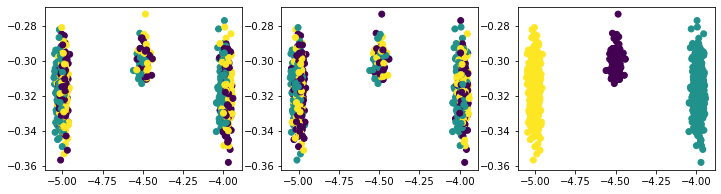

In [85]:
plt.figure(figsize =(12,3))

plt.subplot(1,3,1)
plt.scatter(r_data[:, 0], r_data[:, 1],  c = labels[:,0])

plt.subplot(1,3,2)
plt.scatter(r_data[:, 0], r_data[:, 1],  c = labels[:,1])

plt.subplot(1,3,3)
plt.scatter(r_data[:, 0], r_data[:, 1],  c = labels[:,2])

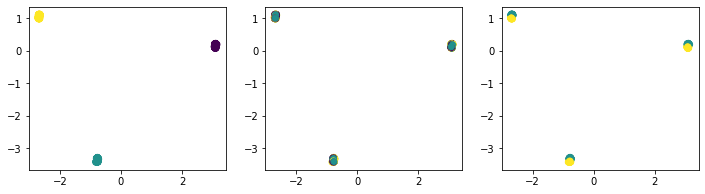

In [87]:
plt.figure(figsize =(12,3))

plt.subplot(1,3,1)
plt.scatter(r_data[:, 2], r_data[:, 3],  c = labels[:,0])

plt.subplot(1,3,2)
plt.scatter(r_data[:, 2], r_data[:, 3],  c = labels[:,1])

plt.subplot(1,3,3)
plt.scatter(r_data[:, 2], r_data[:, 3],  c = labels[:,2])

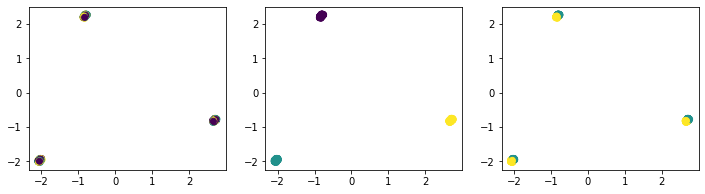

In [88]:
plt.figure(figsize =(12,3))

plt.subplot(1,3,1)
plt.scatter(r_data[:, 4], r_data[:, 5],  c = labels[:,0])

plt.subplot(1,3,2)
plt.scatter(r_data[:, 4], r_data[:, 5],  c = labels[:,1])

plt.subplot(1,3,3)
plt.scatter(r_data[:, 4], r_data[:, 5],  c = labels[:,2])

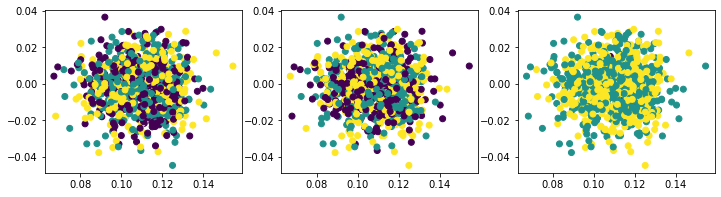

In [89]:
plt.figure(figsize =(12,3))

plt.subplot(1,3,1)
plt.scatter(r_data[:, 6], r_data[:, 7],  c = labels[:,0])

plt.subplot(1,3,2)
plt.scatter(r_data[:, 6], r_data[:, 7],  c = labels[:,1])

plt.subplot(1,3,3)
plt.scatter(r_data[:, 6], r_data[:, 7],  c = labels[:,2])

## c)

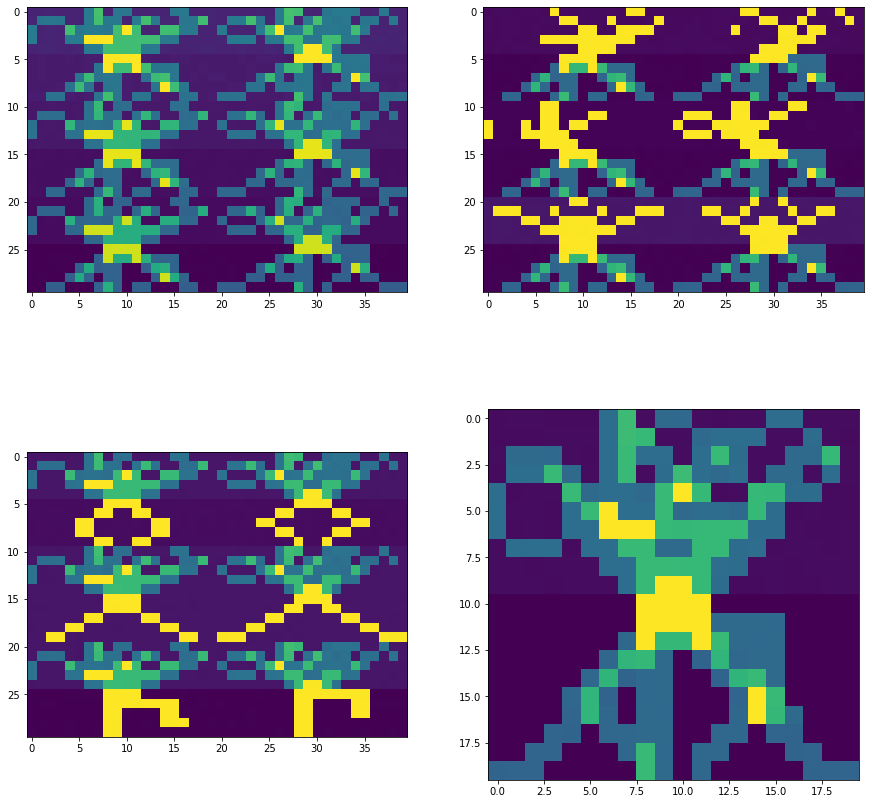

In [135]:
centers_reshape1 = centers[0].reshape(30, 40)
centers_reshape2 = centers[1].reshape(30, 40)
centers_reshape3 = centers[2].reshape(30, 40)
centers_reshape4 = centers[3].reshape(20, 20)

plt.figure(figsize =(15,15))


plt.subplot(2,2,1)
plt.imshow(centers_reshape1)

plt.subplot(2,2,2)
plt.imshow(centers_reshape2)

plt.subplot(2,2,3)
plt.imshow(centers_reshape3)

plt.subplot(2,2,4)
plt.imshow(centers_reshape4)

## d)

In [170]:
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
kmeans = KMeans(n_clusters=3).fit(data)

print(NMI(labels[:,0], kmeans.labels_))
print(NMI(labels[:,1], kmeans.labels_))
print(NMI(labels[:,2], kmeans.labels_))

1.0
0.0
0.0
